In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yeasirmahmud_creditcard_fraud_path = kagglehub.dataset_download('yeasirmahmud/creditcard-fraud')

print('Data source import complete.')


Importing Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler





Dataset exploration

In [ ]:
%matplotlib inline
df = pd.read_csv("/kaggle/input/creditcard-fraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Number of rows and columns

In [ ]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

Dataset contains 284807 rows and 31 columns.



Data Types columnwise

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

descriptive statistics

In [ ]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Checks and prints missing values

In [ ]:

missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0] if missing.any() else "No missing values.")


Missing values:
 No missing values.


Class distribution

In [ ]:
class_counts = df['Class'].value_counts()
class_percent = df['Class'].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Distribution (%):\n", class_percent)

Class Counts:
 Class
0    284315
1       492
Name: count, dtype: int64

Class Distribution (%):
 Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


unique values for each column

In [ ]:
unique_counts = df.nunique().sort_values()
print("\nUnique values per column:\n", unique_counts)


Unique values per column:
 Class          2
Amount     32767
Time      124592
V3        275663
V28       275663
V27       275663
V26       275663
V25       275663
V24       275663
V23       275663
V22       275663
V21       275663
V20       275663
V19       275663
V18       275663
V17       275663
V16       275663
V1        275663
V14       275663
V13       275663
V12       275663
V11       275663
V10       275663
V9        275663
V8        275663
V7        275663
V6        275663
V5        275663
V4        275663
V2        275663
V15       275663
dtype: int64


Correlation heatmap

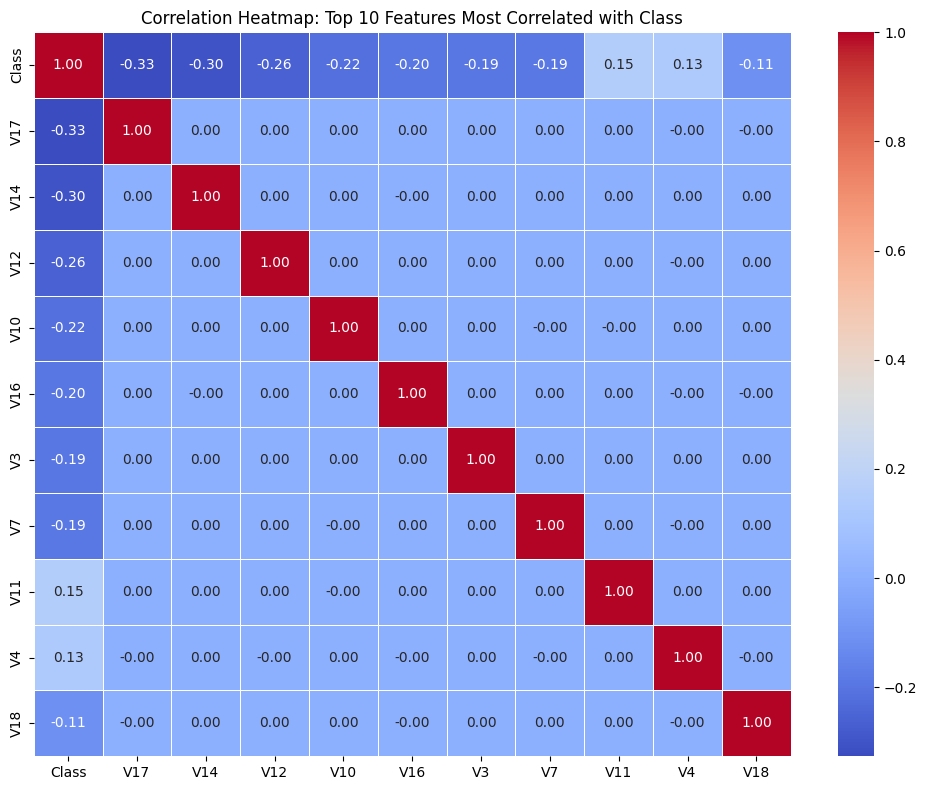

In [ ]:
corr_matrix = df.corr()
top_corr_features = corr_matrix['Class'].abs().sort_values(ascending=False).head(11).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Top 10 Features Most Correlated with Class')
plt.tight_layout()
plt.show()

Skewed features

In [ ]:
print("Skewness of 'Amount':", df['Amount'].skew())
print("Skewness of 'Time':", df['Time'].skew())

Skewness of 'Amount': 16.977724453761006
Skewness of 'Time': -0.03556761800632167


 Distribution of Amount & Time for Fraud vs Normal

In [ ]:
print("\nAmount statistics (Normal):\n", df[df['Class'] == 0]['Amount'].describe())
print("\nAmount statistics (Fraud):\n", df[df['Class'] == 1]['Amount'].describe())

print("\nTime statistics (Normal):\n", df[df['Class'] == 0]['Time'].describe())
print("\nTime statistics (Fraud):\n", df[df['Class'] == 1]['Time'].describe())


Amount statistics (Normal):
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Amount statistics (Fraud):
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Time statistics (Normal):
 count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

Time statistics (Fraud):
 count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


**Visulizations**#

Class Distribution (Fraud vs. Normal)

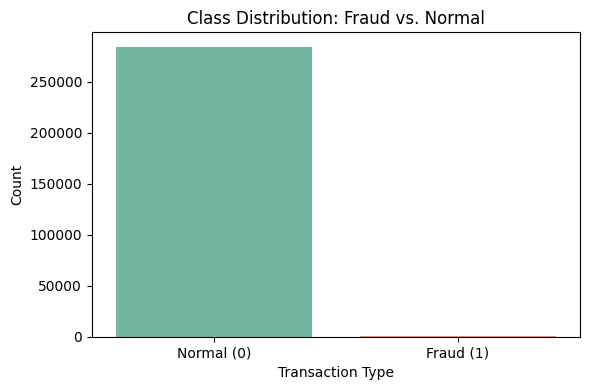

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Class Distribution: Fraud vs. Normal')
plt.xticks([0, 1], ['Normal (0)', 'Fraud (1)'])
plt.ylabel('Count')
plt.xlabel('Transaction Type')
plt.tight_layout()
plt.show()

Transaction Amount Distribution by Class

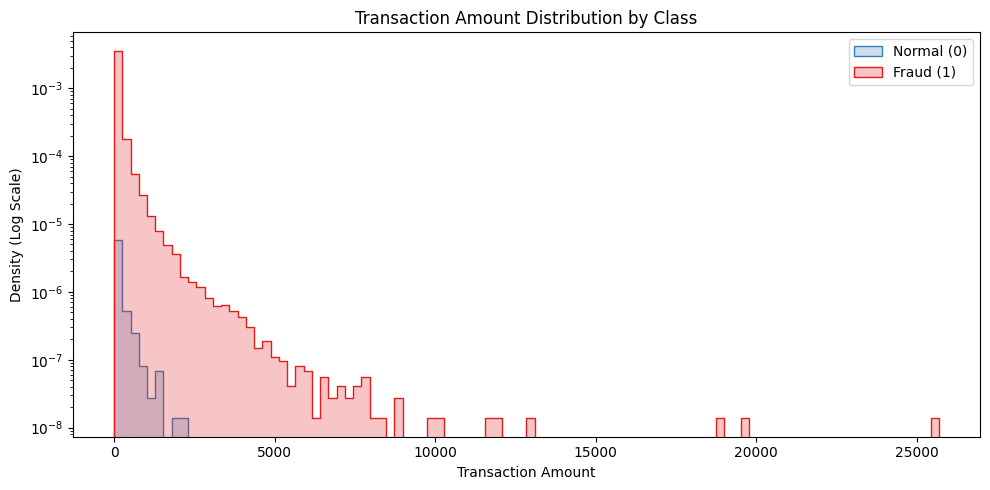

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Amount', hue='Class', bins=100, log_scale=(False, True),
             element='step', stat='density', palette='Set1')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Density (Log Scale)')
plt.legend(['Normal (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()


Top 10 Features Positively Correlated with Fraud

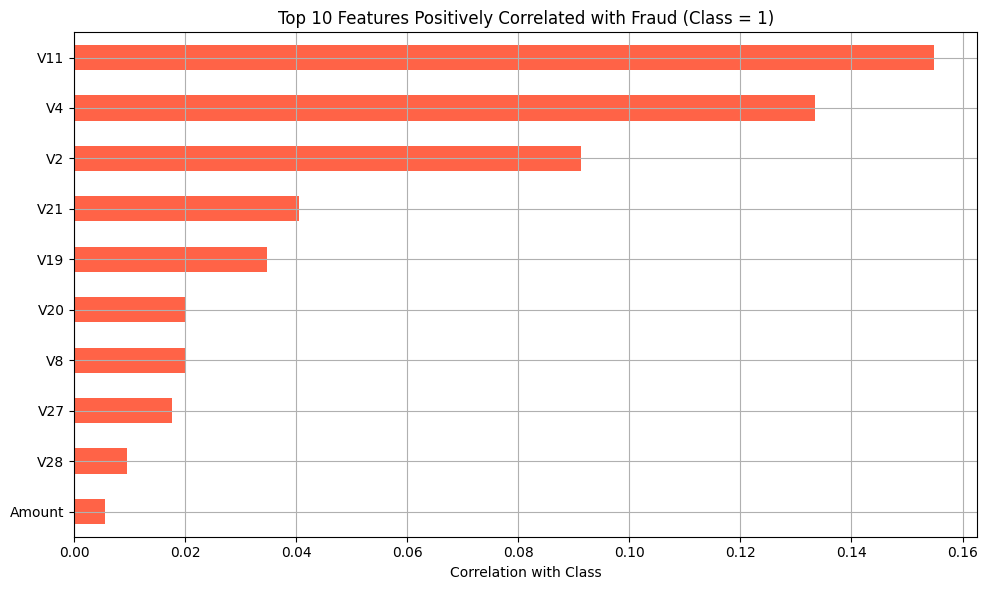

In [ ]:
correlations = df.corr()
class_corr = correlations['Class'].drop('Class').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
class_corr[:10].plot(kind='barh', color='tomato')
plt.title('Top 10 Features Positively Correlated with Fraud (Class = 1)')
plt.xlabel('Correlation with Class')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 Most Correlated Features (By Absolute Value)

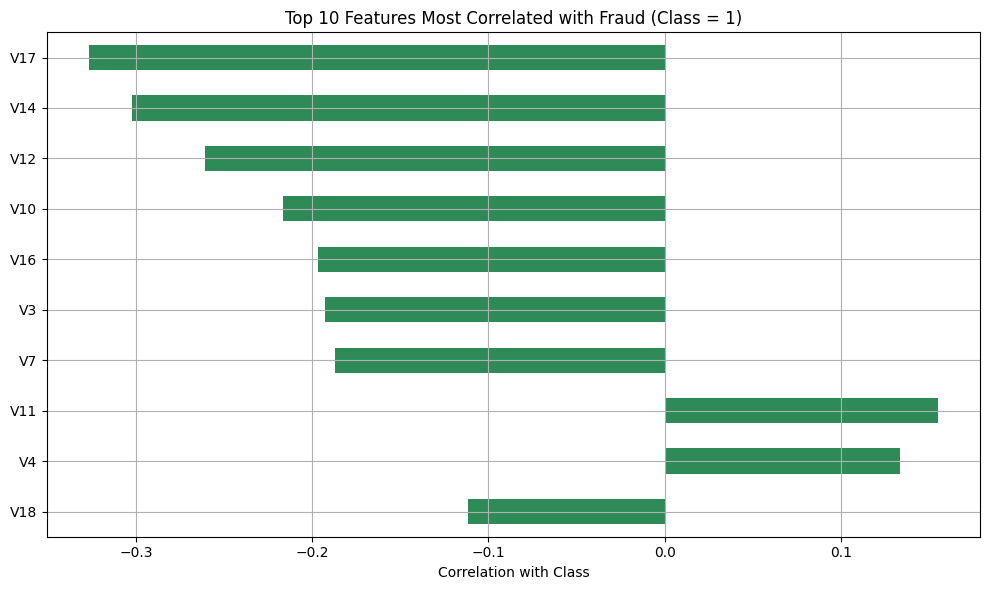

In [ ]:
top_corr = class_corr.abs().sort_values(ascending=False).head(10)
top_corr_features = correlations['Class'][top_corr.index]

plt.figure(figsize=(10, 6))
top_corr_features.plot(kind='barh', color='seagreen')
plt.title('Top 10 Features Most Correlated with Fraud (Class = 1)')
plt.xlabel('Correlation with Class')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


Distribution of Fraud Over Time

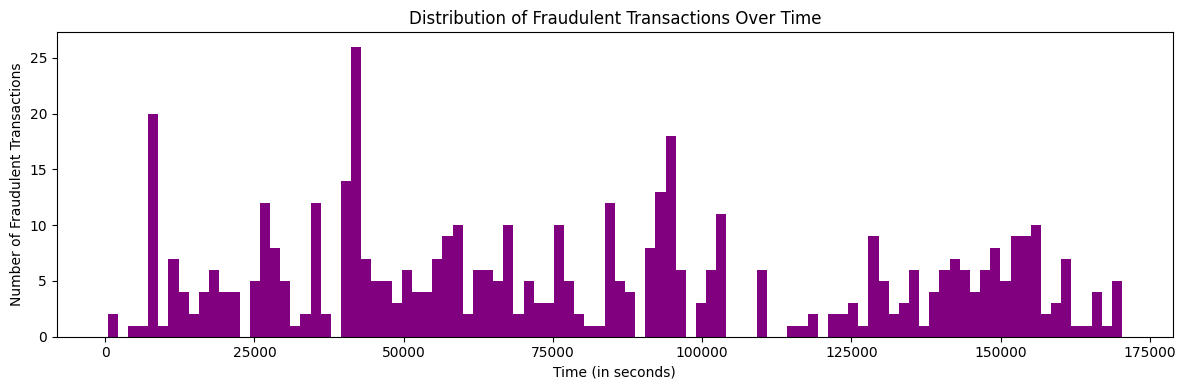

In [ ]:
fraud_df = df[df['Class'] == 1]

plt.figure(figsize=(12, 4))
plt.hist(fraud_df['Time'], bins=100, color='purple')
plt.title('Distribution of Fraudulent Transactions Over Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Number of Fraudulent Transactions')
plt.tight_layout()
plt.show()


Box Plots of Top Fraud-Related Features (V14, V12, V10

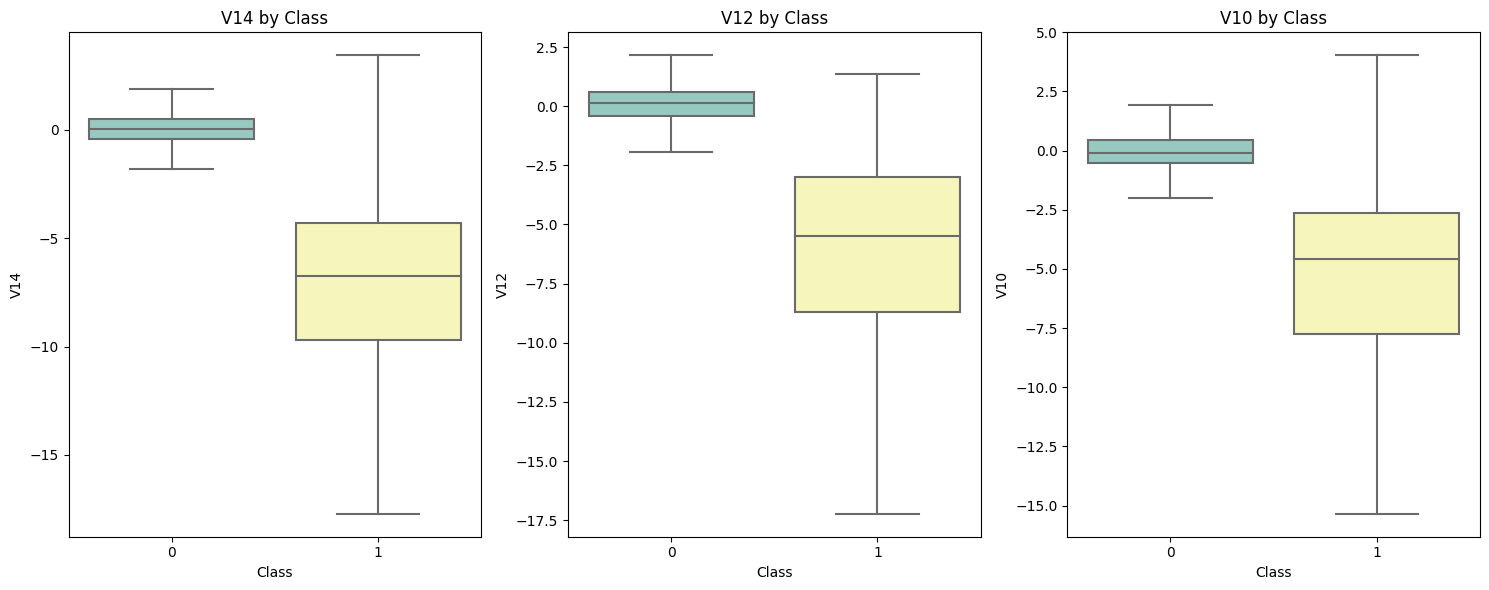

In [ ]:

selected_features = ['V14', 'V12', 'V10']

plt.figure(figsize=(15, 6))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Class', y=feature, data=df, palette='Set3', showfliers=False)
    plt.title(f"{feature} by Class")
    plt.xlabel("Class")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


 KDE Plot of Transaction Amount for Fraud vs Normal

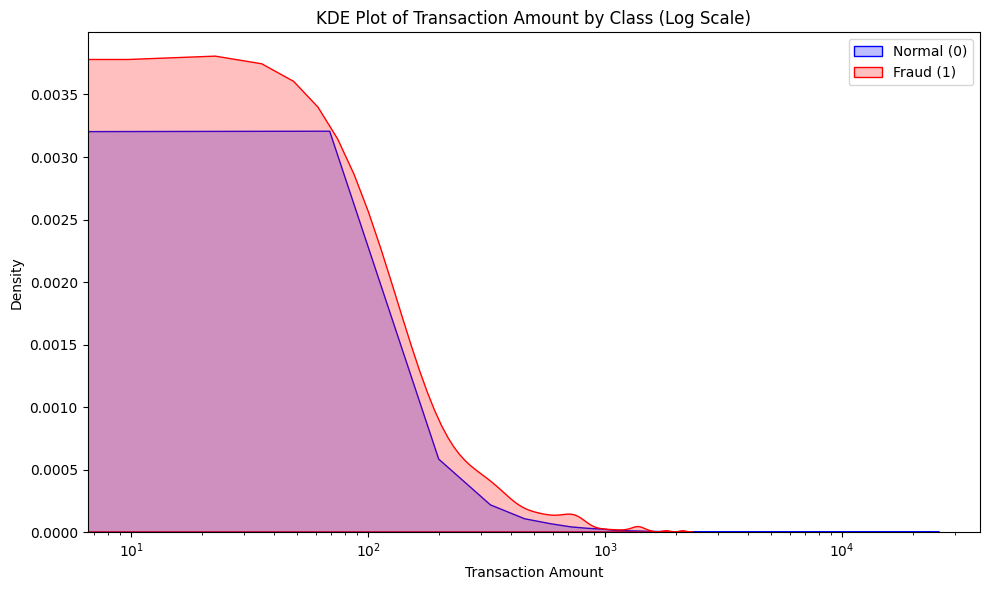

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Class'] == 0, 'Amount'], shade=True, label='Normal (0)', color='blue')
sns.kdeplot(df.loc[df['Class'] == 1, 'Amount'], shade=True, label='Fraud (1)', color='red')
plt.xscale('log')
plt.title('KDE Plot of Transaction Amount by Class (Log Scale)')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


 Count of Fraud Transactions by Hour

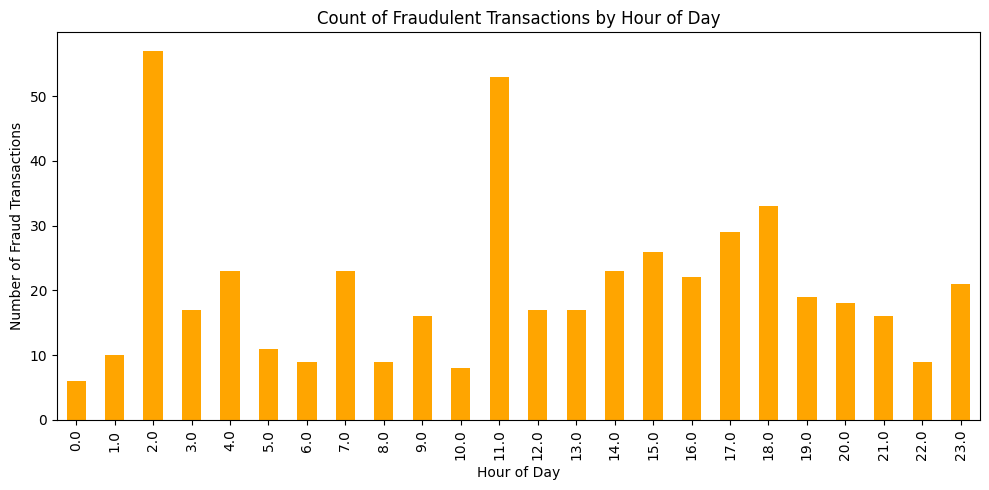

In [ ]:

df['Hour'] = (df['Time'] // 3600) % 24
fraud_hourly = df[df['Class'] == 1].groupby('Hour').size()

plt.figure(figsize=(10, 5))
fraud_hourly.plot(kind='bar', color='orange')
plt.title('Count of Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraud Transactions')
plt.tight_layout()
plt.show()


2D t-SNE projection

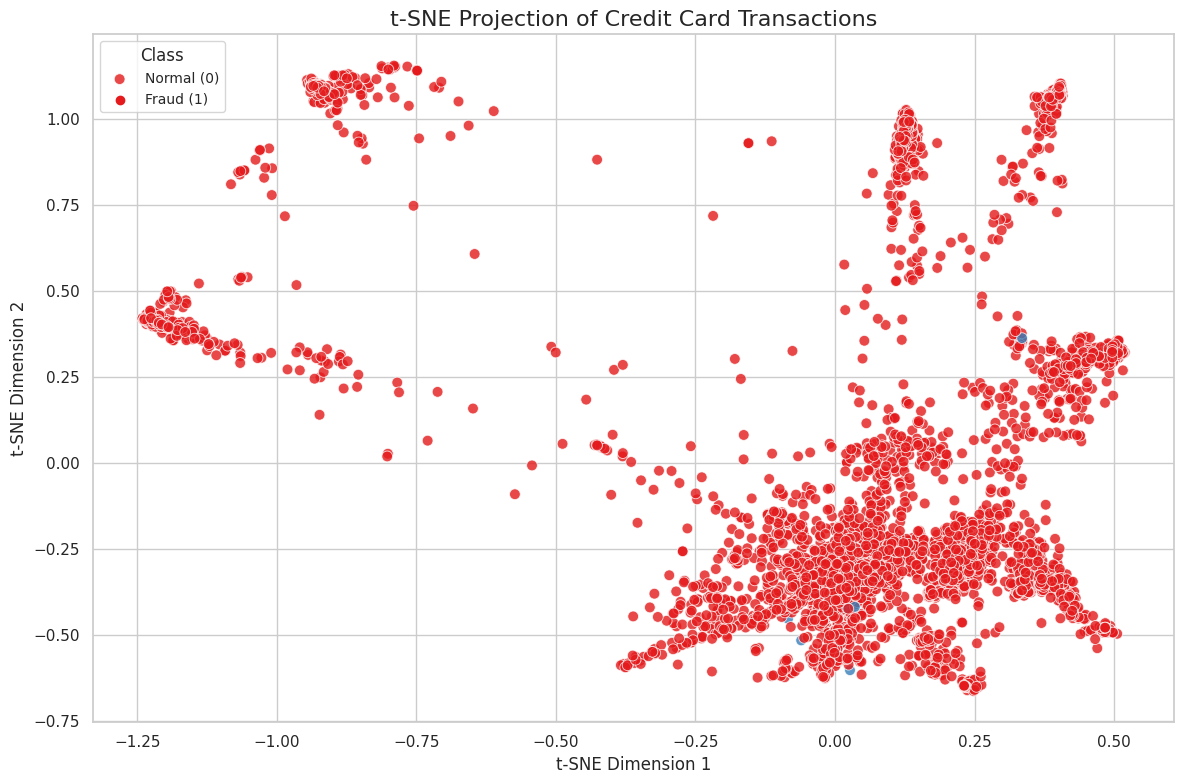

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv("/kaggle/input/creditcard-fraud/creditcard.csv")


sample_df = df.sample(5000, random_state=1)

X = sample_df.drop(['Class', 'Time'], axis=1)
y = sample_df['Class']


X_scaled = StandardScaler().fit_transform(X)


tsne = TSNE(n_components=2, perplexity=30, n_iter=250, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


tsne_df = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'Class': y.values
})


plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.scatterplot(
    data=tsne_df,
    x='TSNE1',
    y='TSNE2',
    hue='Class',
    palette='Set1',
    alpha=0.8,
    s=60
)

plt.title("t-SNE Projection of Credit Card Transactions", fontsize=16)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.legend(title='Class', labels=['Normal (0)', 'Fraud (1)'], loc='best', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

class_counts = y.value_counts()
print("Transaction Class Distribution:")
print(class_counts)
print(f"Fraudulent transactions: {class_counts[1]} out of {class_counts.sum()} ({(class_counts[1] / class_counts.sum()) * 100:.2f}%)")


fraud_stats = sample_df[sample_df['Class'] == 1].describe()
normal_stats = sample_df[sample_df['Class'] == 0].describe()


print("\nAverage transaction amount:")
print(f"Fraudulent: {fraud_stats.loc['mean', 'Amount']:.2f}")
print(f"Normal     : {normal_stats.loc['mean', 'Amount']:.2f}")


Transaction Class Distribution:
Class
0    4994
1       6
Name: count, dtype: int64
Fraudulent transactions: 6 out of 5000 (0.12%)

Average transaction amount:
Fraudulent: 430.85
Normal     : 85.55
